### Libraries

In [41]:
! pip install yfinance

In [42]:
!pip install tsfresh



In [ ]:
!pip install stumpy 

!pip install statsmodels==0.11.1
!pip install python-dateutil=2.7.3 
!pip install scipy==1.5

In [250]:
import stumpy

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
import plotly.graph_objs as go

import yfinance as yf

import pandas as pd
import numpy as np

import datetime  

import matplotlib.pyplot as plt

import seaborn as sns

import tqdm
from tqdm import tqdm
import tslearn

#from sklearn import clustering
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import tsfresh
from tsfresh import extract_features, extract_relevant_features, select_features, feature_extraction
from tsfresh.feature_extraction import settings

from sklearn.feature_selection import VarianceThreshold

from statsmodels.tsa.arima.model import ARIMA

path = '/content/drive/MyDrive/csv/sp500_stocks.csv'

stocks = pd.read_csv(path)

### Functions 

In [45]:
def Candlestick_month(symbol, name):

    fig = go.Figure()

    asset = yf.download(tickers=symbol, period = '1mo', interval = '1d')
    #Candlestick
    fig.add_trace(go.Candlestick(x=asset.index,
                    open=asset['Open'],
                    high=asset['High'],
                    low=asset['Low'],
                    close=asset['Close'], name = 'market data'))

    # Add titles
    fig.update_layout(
        title= f'{name} live share price evolution',
        yaxis_title= f'{name} Price (kUS Dollars)')

    #Show
    fig.show()

In [46]:
# Candlestick graph dynamics per day

def Candlestick(symbol, name):

    fig = go.Figure()

    asset = yf.download(tickers=symbol, period = '22h', interval = '15m')
    #Candlestick
    fig.add_trace(go.Candlestick(x=asset.index,
                    open=asset['Open'],
                    high=asset['High'],
                    low=asset['Low'],
                    close=asset['Close'], name = 'market data'))

    # Add titles
    fig.update_layout(
        title= f'{name} live share price evolution',
        yaxis_title= f'{name} Price (kUS Dollars)')

    # X-Axes
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=15, label="15m", step="minute", stepmode="backward"),
                dict(count=45, label="45m", step="minute", stepmode="backward"),
                dict(count=1, label="HTD", step="hour", stepmode="todate"),
                dict(count=6, label="6h", step="hour", stepmode="backward"),
                dict(step="all")
            ])
        )
    )

    #Show
    fig.show()

In [47]:
#Information about an asset

def crypto_info(symbol, year_start=2021, month_start=1, day_start=1, year_end=2021, month_end=11, day_end=14):

  start = datetime.datetime(year_start, month_start, day_start)
  end = datetime.datetime(year_end, month_end, day_end) 

  asset_info = yf.download(symbol, start=start, end=end)
  return asset_info

Function for cryptos' visualization in the particular cluster

In [252]:
def visualize_cluster(current_cluster, df):
  list_asset = [asset for asset in df.index if df.loc[asset, 'clusters'] == current_cluster]          
  print(f'There are {len(list_asset)} in {current_cluster} cluster')
  for i in range(df.shape[0]): #fig, ax = plt.subplots(,3)
      line = df['clusters'][i]
      if line == current_cluster:
          plt.plot(df.iloc[i, :-1])
          plt.xticks(rotation=45)
          plt.title(df.index[i])
          plt.show()

Prediction for certain crypto currency

In [261]:
def crypto_prediction(crypto_ticker, start='2021-11-01 00:00:00', end='2021-01-30 00:00:00'):

    mod = ARIMA(assets_tr_.loc[crypto_ticker, :], order=(1,0, 0), freq='D')
    res = mod.fit()
    pred = res.predict(start=start, end=end)

    plt.plot(assets_tr_.loc[crypto_ticker, '2021-10-01 00:00:00':])

    plt.plot(pred)
    plt.xticks(rotation=45)

    plt.show()

### Crypto Analysis

Top cryptos by market cap were selected  
source: [yahoo-finance watchlist](https://finance.yahoo.com/u/yahoo-finance/watchlists/crypto-top-market-cap/)

In [48]:
cryptos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'SOL1-USD', 'ADA-USD', 'XRP-USD', 'DOT1-USD', 'HEX-USD', \
          'DOGE-USD', 'USDC-USD', 'SHIB-USD', 'LUNA1-USD', 'AVAX-USD', 'LTC-USD', 'LINK-USD', 'UNI3-USD', 'BCH-USD', \
          'ALGO-USD', 'MATIC-USD', 'CRO-USD', 'VET-USD', 'XLM-USD', 'ICP1-USD', 'AXS-USD', 'TRX-USD', 'FIL-USD', \
          'ETC-USD', 'ATOM1-USD', 'THETA-USD']

### DataFrame with closing prices of cryptos

In [49]:
start = datetime.datetime(2021, 1, 10)
end = datetime.datetime(2021, 12, 2)

assets = pd.DataFrame()
for i in cryptos:
  assets[i] = yf.download(i, start=start, end=end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [50]:
assets.tail()

,BTC-USD,ETH-USD,BNB-USD,USDT-USD,SOL1-USD,ADA-USD,XRP-USD,DOT1-USD,HEX-USD,DOGE-USD,USDC-USD,SHIB-USD,LUNA1-USD,AVAX-USD,LTC-USD,LINK-USD,UNI3-USD,BCH-USD,ALGO-USD,MATIC-USD,CRO-USD,VET-USD,XLM-USD,ICP1-USD,AXS-USD,TRX-USD,FIL-USD,ETC-USD,ATOM1-USD,THETA-USD
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-28,57248.457031,4294.453613,611.366821,1.000125,200.676651,1.592855,0.968751,35.765121,0.173974,0.207472,0.999875,0.000039,50.096794,110.589020,199.354218,24.823910,20.169500,568.336182,1.711715,1.651840,0.753905,0.116457,0.323640,41.812035,133.007568,0.095103,56.495411,47.523163,27.404688,6.615669
2021-11-29,57806.566406,4445.104980,624.310059,1.000526,204.319366,1.602508,0.991961,37.162655,0.183415,0.215175,1.000078,0.000046,51.703499,120.258301,205.870209,25.017925,20.303202,576.121765,1.777569,1.817825,0.713988,0.121220,0.328523,42.042595,134.664810,0.096661,54.815617,48.283283,28.125826,6.661822
2021-11-30,57005.425781,4631.479004,622.669861,1.000286,208.670990,1.554903,0.998754,37.960495,0.171498,0.214715,0.999456,0.000047,59.718266,120.343697,208.014542,25.341774,21.242640,570.529663,1.813682,1.785351,0.690416,0.119090,0.336164,40.767921,137.148911,0.096610,53.763393,48.375690,27.549656,6.615837
2021-12-01,57229.828125,4586.990234,627.971558,1.000255,229.799240,1.547713,0.990930,36.773266,0.180344,0.209487,0.999593,0.000044,64.231544,119.750847,208.971252,25.356211,20.972164,571.056885,1.967895,2.008298,0.721203,0.118327,0.327880,41.022621,135.098404,0.096900,54.385078,47.891624,26.709431,6.526936
2021-12-02,56477.816406,4511.302246,619.470154,1.000174,233.993042,1.715366,0.972312,35.757893,0.180481,0.209726,0.998839,0.000042,66.184402,107.866547,203.489624,24.537094,22.368469,561.450623,1.883214,2.127288,0.694100,0.115828,0.338310,40.123329,135.082489,0.097415,53.673012,47.064156,28.375084,6.364888


## Examples

**Crypto_info() function** 

In [51]:
crypto_info('ETH-USD').tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-10,4733.362793,4859.502930,4485.093262,4636.174316,4636.174316,22748160545
2021-11-11,4635.453613,4778.059082,4580.990234,4730.384277,4730.384277,17933201129
2021-11-12,4724.306641,4808.738770,4510.920410,4667.115234,4667.115234,18316060208
2021-11-13,4666.719238,4702.115234,4582.180664,4651.460449,4651.460449,14457436261
2021-11-14,4648.632812,4689.842773,4516.935547,4626.358887,4626.358887,12172962219


**Candlestick_month() function**

In [52]:
eth = pd.DataFrame(crypto_info('ETH-USD')['Close'])

[*********************100%***********************]  1 of 1 completed


In [53]:
eth

,Close
Date,
2021-01-01,730.367554
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104
...,...
2021-11-10,4636.174316
2021-11-11,4730.384277
2021-11-12,4667.115234


In [54]:
eth['return'] = eth.Close.pct_change()

In [55]:
eth

,Close,return
Date,,
2021-01-01,730.367554,NaN
2021-01-02,774.534973,0.060473
2021-01-03,975.507690,0.259475
2021-01-04,1040.233032,0.066350
2021-01-05,1100.006104,0.057461
...,...,...
2021-11-10,4636.174316,-0.020886
2021-11-11,4730.384277,0.020321
2021-11-12,4667.115234,-0.013375


In [56]:
Candlestick_month('ETH-USD', 'Ethereum')

[*********************100%***********************]  1 of 1 completed


**Candlestick() function**

In [57]:
Candlestick('ETH-USD', 'Ethereum')

[*********************100%***********************]  1 of 1 completed


## Clusterization

1. Cluserization using Kmeans without generated features
2. Cluserization using Kmeans with generated features





### 1. Cluserization using Kmeans without generated features

Create new dataframe assets_norm with normalized assets

In [264]:
#assets.notna().idxmax()

In [59]:
assets.fillna(0, inplace=True)

In [64]:
scaled_data = StandardScaler().fit_transform(assets).T

Definition of a number of clusters

*   Analysis of SSE and silhoette
*   Definition of the number of clusters



The higher silhouette - the better <br>
The lower SSE - the better

100%|██████████| 9/9 [00:00<00:00, 57.23it/s]


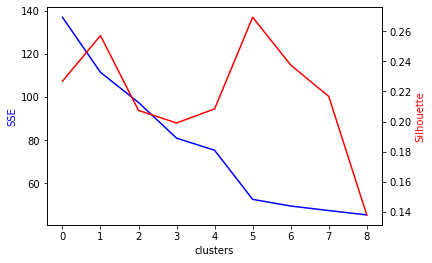

In [265]:
sse = []
silhouette = []
K = range(2, 11)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric='euclidean', init='random', max_iter=300)
    kmeanModel.fit(scaled_data)
    sse.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(scaled_data, kmeanModel.labels_, metric='euclidean'))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(sse, 'b-')
ax2.plot(silhouette, 'r-')

ax1.set_xlabel('clusters')
ax1.set_ylabel('SSE', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

Number of clusters chosen: 5

In [142]:
n_clusters = 5
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='euclidean', init='random', max_iter=300)
ts_kmeans.fit(scaled_data) #predicting cluster of the assets given 

TimeSeriesKMeans(init='random', max_iter=300, n_clusters=5)

Visualization of cluster centroids

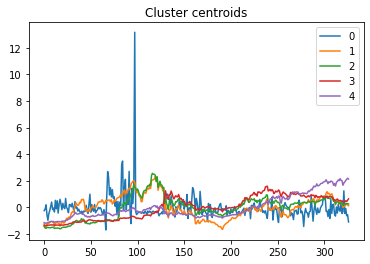

In [143]:
for cluster in range(n_clusters):
  plt.plot(ts_kmeans.cluster_centers_[cluster, :, 0], label=cluster)
plt.title('Cluster centroids')
plt.legend()
plt.show()

Addition of a column **clusters** to the dataframe assets_transposed

In [144]:
assets_transposed = assets.T

In [257]:
assets.T['clusters'] = ts_kmeans.predict(scaled_data)

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning:

2-Dimensional data passed. Assuming these are 30 1-dimensional timeseries



Cryptos' visualization in the particular cluster

In [258]:
#visualize_cluster(4, assets_transposed)

### 2. Cluserization using Kmeans with generated features

Normalization of assets <br> $z=\frac{(x_i - \overline {x})} {σ}$


In [121]:
norm_assets = assets.copy()

In [122]:
for column_ in norm_assets.columns:
  for i in range(norm_assets.shape[0]):
      norm_assets[column_][i] = (norm_assets[column_][i] - np.nanmean(norm_assets[column_])) / np.std(norm_assets[column_])

In [123]:
norm_assets_tr = norm_assets.T.copy()

In [124]:
norm_assets_tr['crypto'] = norm_assets_tr.index

In [146]:
assets_tr = assets.T.copy()

Addition of relevant parameters

In [125]:
settings_efficient = settings.TimeBasedFCParameters()
settings_efficient.update(settings.MinimalFCParameters())
settings_efficient.update(settings.IndexBasedFCParameters())


Feature generation 

In [158]:
EXTRACT = True

if EXTRACT:
    x_norm = extract_features(norm_assets_tr, settings_efficient, column_id='crypto')
 # column_id=norm_assets_tr.index)
    x_norm.to_csv('X_train_tsfel_norm.csv')
else:
    x_norm = pd.read_csv('X_train_tsfel_norm.csv', index_col=0)

x_norm.shape


Feature Extraction: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]


(30, 3924)

3924 features were generated <br>

Tasks:
*   Drop NaN  
*   Drop duplicate columns 
*   Drop columns with the opposite sign




*   Drop NaN




In [159]:
x_norm.dropna(inplace=True, axis=1)

In [197]:
x_norm.shape

(30, 3270)

*   Drop duplicates: their corr = 1 
*   Drop columns with the opposite sign: their corr = -1 



In [198]:
x_red = x_norm.T.drop_duplicates(ignore_index=True).T

In [228]:
x_red_pos = x_red[(x_red > 0)].dropna(axis=1)

There are 329 generated features without duplicates and NaN

Features with a variance lower than the threshold are removed

In [218]:
selector = VarianceThreshold()
X_reduced_pos = selector.fit_transform(x_red_pos)


327 features left

In [262]:
X_reduced_pos.shape

(30, 327)

*   Analysis of SSE and silhoette
*   Definition of the number of clusters


100%|██████████| 9/9 [00:00<00:00, 58.37it/s]


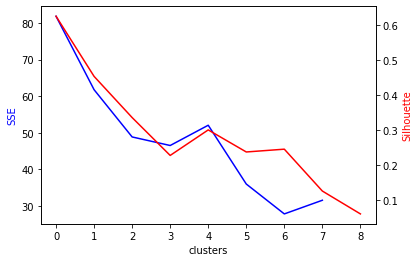

In [238]:
sse = []
silhouette = []
K = range(2, 11)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric='euclidean', init='random', max_iter=300)
    kmeanModel.fit(X_reduced_pos)
    sse.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(X_reduced_pos, kmeanModel.labels_, metric='euclidean'))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(sse, 'b-')
ax2.plot(silhouette, 'r-')

ax1.set_xlabel('clusters')
ax1.set_ylabel('SSE', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()


Number of clusters = 6

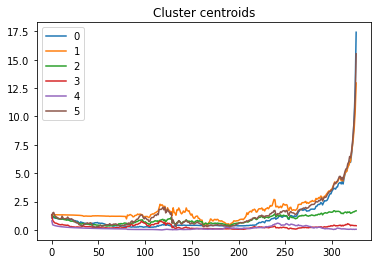

In [239]:
n_clusters = 6
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='euclidean', init='random', max_iter=300)
ts_kmeans.fit(X_reduced_pos) #predicting cluster of the assets given 

for cluster in range(n_clusters):
  plt.plot(ts_kmeans.cluster_centers_[cluster, :, 0], label=cluster)
plt.title('Cluster centroids')
plt.legend()
plt.show()

Addition of a column **crypto** with predicted classes to **assets_features_pos** dataframe

In [241]:
x_red_pos['clusters'] = ts_kmeans.predict(X_reduced_pos)
assets_features_pos = assets_tr.join(x_red_pos[['clusters']])

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning:

2-Dimensional data passed. Assuming these are 30 1-dimensional timeseries



Visualization of the clusterization with generated features

In [259]:
#visualize_cluster(4, assets_features_pos)

## Forecasting

In [151]:
assets_tr_ = assets.T.copy()

Create a function to predict certain crypto

In [156]:
def crypto_prediction(crypto_ticker, start='2021-11-01 00:00:00', end='2021-12-31 00:00:00'):

    mod = ARIMA(assets_tr_.loc[crypto_ticker, :], order=(1,0, 0), freq='D')
    res = mod.fit()
    pred = res.predict(start=start, end=end)

    plt.plot(assets_tr_.loc[crypto_ticker, '2021-10-01 00:00:00':])

    plt.plot(pred)
    plt.xticks(rotation=45)

    plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



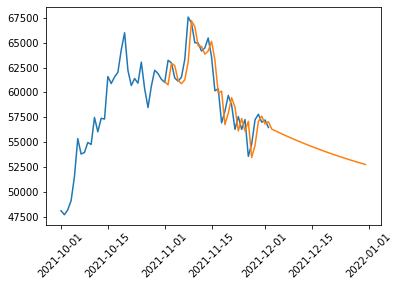

In [157]:
crypto_prediction('BTC-USD')